# Proyek Analisis Data: Bike Hirings
- **Nama:** Ahmad Hanafi
- **Email:** hanapiahmad07@gmail.com
- **ID Dicoding:** hanafiiahmd


## Menentukan Pertanyaan Bisnis

- Bagaimanaah trend peminjaman sepeda dari "casual" pelanggan dan "registered pelanggan" selama 2011 hingga 2012?
- Kapankah waktu peminjaman sepeda mencapai tingkat tertinggi? (dalam rentang bulan dan jam)?
- Faktor-faktor apa sajakah yang sangat mempengaruhi tingkat peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#Menginput data day ke dalam data frame
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Menginput data day ke dalam data frame
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data peminjaman sepeda/rental sepeda yang memiliki dua data frame yaitu day dan hour
- Atribut-atribut yang terdapat pada data tersebut antara lain:
1. instant : sebagai index/nomor peminjaman yang telah terdaftar atau terekam sistem
2. dteday : tanggal peminjaman (hari,bulan,tahun)
3. season : musim pada saat peminjaman sepeda, dimana 1: springer, 2: summer, 3:fall, 4: winter
4. year : tahun peminjaman dimana 0: tahun 2011, 1: tahun 2012
5. mnth : bulan peminjaman, 1-12 (Januari sampai Desember)
6. hr : jam peminjaman, 0-23
7. workingday : 1 bila holiday atau weekend, 0 bila lainnya
8. weekday : hari peminjaman 0-6 (Monday to Sunday)
9. weathersit: keadaan cuaca pada saat peminjaman, dimana 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
10. temp : Normalized temperature in Celsius
11. atemp: Normalized feeling temperature
12. hum: kelembapan udara pada saat peminjaman
13. windspeed : kecepatan angin pada saat peminjaman
14. holiday : apakah holiday atau tidak pada saat peminjaman, 1: holiday/weekend, 0: lainnya
15. casual : jumlah peminjam sepeda yang belum terdaftar di aplikasi/sistem bike hirings (pelanggan baru)
16. registered : jumlah peminjam sepeda yang sudah terdaftar di sistem
17. cnt : jumlah peminjam sepeda casual + registered


### Assessing Data

In [ ]:
#Melihat info dari data frame day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
#Memeriksa apakah ada nilai missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
#Memeriksa apakah ada nilai duplikat dalam data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#Melihat statistik data frame day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#Melihat info data frame hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#Memeriksa nilai missing value
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
#Memeriksa nilai duplikat dalam data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#Melihat statistik dari data frame hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada nilai missing value dari kedua data frame
- Tidak ada nilai duplikat dalam kedua data frame
- Ada beberapa type object yang salah seperti dteday

### Cleaning Data

In [ ]:
#Membersihkan kolom dateday pada data day_df
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Mengganti tipe data menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
# Mengganti tipe data season menjadi kategorikal
day_df['season'] = day_df['season'].map({
    1: 'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})
print(day_df[['season']])

       season
0    springer
1    springer
2    springer
3    springer
4    springer
..        ...
726  springer
727  springer
728  springer
729  springer
730  springer

[731 rows x 1 columns]


In [ ]:
# Mengganti tipe data yr menjadi kategorical
year_mapping = {
    0: 2011,
    1: 2012
}

day_df['yr'] = day_df['yr'].map(year_mapping)

print(day_df[['yr']].head())

     yr
0  2011
1  2011
2  2011
3  2011
4  2011


In [ ]:
# Mendefinisikan nilai bulan yang sebelumnya integer ke dalam kategorikal
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}


day_df['month_name'] = day_df['mnth'].map(month_mapping)


print(day_df[['mnth', 'month_name']].head())

   mnth month_name
0     1    January
1     1    January
2     1    January
3     1    January
4     1    January


In [ ]:
weekday_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

day_df['weekday_name'] = day_df['weekday'].map(weekday_mapping)

print(day_df[['weekday', 'weekday_name']].head())

   weekday weekday_name
0        6       Sunday
1        0       Monday
2        1      Tuesday
3        2    Wednesday
4        3     Thursday


In [ ]:
weather_mapping = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'  # Adjust based on your dataset if there are any missing conditions
}

day_df['weather_condition'] = day_df['weathersit'].map(weather_mapping)

print(day_df[['weathersit', 'weather_condition']].head())

   weathersit                                  weather_condition
0           2  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...
1           2  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...
2           1    Clear, Few clouds, Partly cloudy, Partly cloudy
3           1    Clear, Few clouds, Partly cloudy, Partly cloudy
4           1    Clear, Few clouds, Partly cloudy, Partly cloudy


In [ ]:
# Mengganti tipe data season menjadi kategorikal
hour_df['season'] = hour_df['season'].map({
    1: 'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})
print(hour_df[['season']])

         season
0      springer
1      springer
2      springer
3      springer
4      springer
...         ...
17374  springer
17375  springer
17376  springer
17377  springer
17378  springer

[17379 rows x 1 columns]


In [ ]:
# Mengganti tipe data yr menjadi kategorical
year_mapping = {
    0: 2011,
    1: 2012
}

hour_df['yr'] = hour_df['yr'].map(year_mapping)

print(hour_df[['yr']].head())

     yr
0  2011
1  2011
2  2011
3  2011
4  2011


In [ ]:

month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

hour_df['month_name'] = hour_df['mnth'].map(month_mapping)

print(hour_df[['mnth', 'month_name']].head())

   mnth month_name
0     1    January
1     1    January
2     1    January
3     1    January
4     1    January


In [ ]:
weekday_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

hour_df['weekday_name'] = hour_df['weekday'].map(weekday_mapping)

print(hour_df[['weekday', 'weekday_name']].head())

   weekday weekday_name
0        6       Sunday
1        6       Sunday
2        6       Sunday
3        6       Sunday
4        6       Sunday


In [ ]:
hour_mapping = {i: f'{i % 12 or 12} {"AM" if i < 12 else "PM"}' for i in range(24)}

hour_df['hour_description'] = hour_df['hr'].map(hour_mapping)

print(hour_df[['hr', 'hour_description']].head())

   hr hour_description
0   0            12 AM
1   1             1 AM
2   2             2 AM
3   3             3 AM
4   4             4 AM


In [ ]:
weather_mapping = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'  # Adjust based on your dataset if there are any missing conditions
}

day_df['weather_condition'] = day_df['weathersit'].map(weather_mapping)

print(day_df[['weathersit', 'weather_condition']].head())

hour_df['weather_condition'] = hour_df['weathersit'].map(weather_mapping)

print(hour_df[['weathersit', 'weather_condition']].head())

   weathersit                                  weather_condition
0           2  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...
1           2  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...
2           1    Clear, Few clouds, Partly cloudy, Partly cloudy
3           1    Clear, Few clouds, Partly cloudy, Partly cloudy
4           1    Clear, Few clouds, Partly cloudy, Partly cloudy
   weathersit                                weather_condition
0           1  Clear, Few clouds, Partly cloudy, Partly cloudy
1           1  Clear, Few clouds, Partly cloudy, Partly cloudy
2           1  Clear, Few clouds, Partly cloudy, Partly cloudy
3           1  Clear, Few clouds, Partly cloudy, Partly cloudy
4           1  Clear, Few clouds, Partly cloudy, Partly cloudy


In [ ]:
# Standardize the date format
day_df['dteday'] = pd.to_datetime(day_df['dteday'], format='%m/%d/%Y')
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], format='%Y-%m-%d')

# Menggabungkan dua data frame
merged_data = pd.merge(hour_df, day_df, on='dteday', suffixes=('_hour', '_day'))

# Display the first few rows of the merged dataset
print(merged_data.head())

   instant_hour     dteday season_hour  yr_hour  mnth_hour  hr  holiday_hour  \
0             1 2011-01-01    springer     2011          1   0             0   
1             2 2011-01-01    springer     2011          1   1             0   
2             3 2011-01-01    springer     2011          1   2             0   
3             4 2011-01-01    springer     2011          1   3             0   
4             5 2011-01-01    springer     2011          1   4             0   

   weekday_hour  workingday_hour  weathersit_hour  ...  temp_day  atemp_day  \
0             6                0                1  ...  0.344167   0.363625   
1             6                0                1  ...  0.344167   0.363625   
2             6                0                1  ...  0.344167   0.363625   
3             6                0                1  ...  0.344167   0.363625   
4             6                0                1  ...  0.344167   0.363625   

    hum_day  windspeed_day  casual_day  regi

In [ ]:
#Menghapus kolom data yang tidak diperlukan

merged_data = merged_data.drop(
    columns=[
        'instant_hour', 'instant_day'])
merged_data.head()


,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,month_name_day,weekday_name_day,weather_condition_day
0,2011-01-01,springer,2011,1,0,0,6,0,1,0.24,...,0.344167,0.363625,0.805833,0.160446,331,654,985,January,Sunday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
1,2011-01-01,springer,2011,1,1,0,6,0,1,0.22,...,0.344167,0.363625,0.805833,0.160446,331,654,985,January,Sunday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
2,2011-01-01,springer,2011,1,2,0,6,0,1,0.22,...,0.344167,0.363625,0.805833,0.160446,331,654,985,January,Sunday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
3,2011-01-01,springer,2011,1,3,0,6,0,1,0.24,...,0.344167,0.363625,0.805833,0.160446,331,654,985,January,Sunday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
4,2011-01-01,springer,2011,1,4,0,6,0,1,0.24,...,0.344167,0.363625,0.805833,0.160446,331,654,985,January,Sunday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."


**Insight:**
- Tidak ada missing value serta duplicate data dalam data frame day dan hour
- Ada beberapa atribut yang memiliki kesalahan type, jadi perlu di bershikan, antara lain sebagai berikut:
- 'dteday' sebelumnya bertipe object menjadi datetime
- Beberapa atribut diubah menjadi kategorikal untuk kepentingan analisis data, seperti:
1. Year
2. Month
3. Day
4. Hour
5. Season
6. Weather situation
- Setelah selesai, maka dua data frame tersebut di gabung, untuk mempermudah melakukan analisis

## Exploratory Data Analysis (EDA)

In [ ]:
#Rangkuman parameter statistik dari day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month_name,weekday_name,weather_condition
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731,731
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,7,3
top,NaN,NaN,fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,January,Sunday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,105,463
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN,NaN


In [ ]:
#Rangkuman parameter statistik dari hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,month_name,weekday_name,hour_description,weather_condition
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379,17379,17379
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12,7,24,4
top,NaN,NaN,fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,May,Sunday,5 PM,"Clear, Few clouds, Partly cloudy, Partly cloudy"
freq,NaN,NaN,4496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1488,2512,730,11413
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN,NaN,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN,NaN,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN,NaN,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN,NaN,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN,NaN,NaN


In [ ]:
# Group by 'mnth' and 'season', then calculate the total bike rentals
bike_rental_by_month_weekday = day_df.groupby(['month_name', 'weekday_name'])['cnt'].sum().unstack()

# Display the result
print("Total bike rentals by month and weekday:")
print(bike_rental_by_month_weekday)

Total bike rentals by month and weekday:
weekday_name  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
month_name                                                                  
April          38112   39752     39483   40011     34647    40642      36447
August         54345   37624     53626   41791     60769    49665      53374
December       33398   24659     33682   31949     26163    31479      29706
February       23028   17980     23465   18132     25320    20835      22592
January        20106   18159     19572   17609     17109    19268      23110
July           44989   52981     48653   47091     46512    52124      52598
June           50596   47523     50547   57094     51309    43826      45447
March          38170   26408     35332   35449     33030    28365      32166
May            53034   47882     46008   47828     46073    40611      50250
November       35949   33009     40713   34304     37227    37267      36362
October        44298   42614     44

In [ ]:
# Group by 'month_name' and calculate the total bike rentals for 'casual' and 'registered'
bike_rental_casual_registered = day_df.groupby('month_name')[['casual', 'registered']].sum().unstack()

# Display the result
print("Total bike rentals by casual and registered user by month:")
print(bike_rental_casual_registered)

Total bike rentals by casual and registered user by month:
            month_name
casual      April          60802
            August         72039
            December       21693
            February       14963
            January        12042
            July           78157
            June           73906
            March          44444
            May            75285
            November       36603
            October        59760
            September      70323
registered  April         208292
            August        279155
            December      189343
            February      136389
            January       122891
            July          266791
            June          272436
            March         184476
            May           256401
            November      218228
            October       262592
            September     275668
dtype: int64


In [ ]:
# Group by 'season' and calculate the total bike rental
bike_rental_by_season = day_df.groupby('season')['cnt'].sum()

# Display the result
print(bike_rental_by_season)

season
fall        1061129
springer     471348
summer       918589
winter       841613
Name: cnt, dtype: int64


In [ ]:
day_df.groupby(by="season").agg({
    "cnt": "sum",
    "windspeed": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt windspeed                               
              sum       max       min      mean <lambda_0>
season                                                    
fall      1061129  0.375617  0.064071  0.172095   0.311546
summer     918589  0.388067  0.065929  0.203507   0.322138
winter     841613  0.422275  0.022392  0.171995   0.399883
springer   471348  0.507463  0.045408  0.214537   0.462055

In [ ]:
day_df.groupby(by="season").agg({
    "cnt": "sum",
    "hum": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt       hum                               
              sum       max       min      mean <lambda_0>
season                                                    
fall      1061129  0.939565  0.360000  0.633482   0.579565
summer     918589  0.922500  0.254167  0.626948   0.668333
winter     841613  0.972500  0.333478  0.668719   0.639022
springer   471348  0.948261  0.000000  0.582903   0.948261

In [ ]:
day_df.groupby(by="season").agg({
    "cnt": "sum",
    "hum": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt       hum                               
              sum       max       min      mean <lambda_0>
season                                                    
fall      1061129  0.939565  0.360000  0.633482   0.579565
summer     918589  0.922500  0.254167  0.626948   0.668333
winter     841613  0.972500  0.333478  0.668719   0.639022
springer   471348  0.948261  0.000000  0.582903   0.948261

In [ ]:
# Group by 'hour_description' and calculate the total bike rental
bike_rental_by_hour = hour_df.groupby('hour_description')['cnt'].sum()

# Display the result
print(bike_rental_by_hour)

hour_description
1 AM      24164
1 PM     184919
10 AM    126257
10 PM     95612
11 AM    151320
11 PM     63941
12 AM     39130
12 PM    184414
2 AM      16352
2 PM     175652
3 AM       8174
3 PM     183149
4 AM       4428
4 PM     227748
5 AM      14261
5 PM     336860
6 AM      55132
6 PM     309772
7 AM     154171
7 PM     226789
8 AM     261001
8 PM     164550
9 AM     159438
9 PM     125445
Name: cnt, dtype: int64


In [ ]:
merged_data.groupby(by="season_day").agg({
    "holiday_day": "count",
    "windspeed_day": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("holiday_day", "count"), ascending=False)

holiday_day windspeed_day                               
                 count           max       min      mean <lambda_0>
season_day                                                         
fall              4496      0.375617  0.064071  0.171593   0.311546
summer            4409      0.388067  0.065929  0.203410   0.322138
springer          4242      0.507463  0.045408  0.215107   0.462055
winter            4232      0.422275  0.022392  0.170819   0.399883

In [ ]:
# Group by 'season' and calculate the total of casual who rental bike
bike_rental_by_season2 = hour_df.groupby('season')['casual'].sum()

# Display the result
print(bike_rental_by_season2)

season
fall        226091
springer     60622
summer      203522
winter      129782
Name: casual, dtype: int64


In [ ]:
# Group by 'season' and calculate the total of casual who rental bike
bike_rental_by_season3 = hour_df.groupby('season')['registered'].sum()

# Display the result
print(bike_rental_by_season3)

season
fall        835038
springer    410726
summer      715067
winter      711831
Name: registered, dtype: int64


In [ ]:
# Select only numeric columns for correlation
numeric_columns = merged_data.select_dtypes(include='number')

# Compute the correlation matrix using only numeric columns
correlation_matrix = numeric_columns.corr()
correlation_matrix


,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
yr_hour,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,...,-0.004485,-0.002196,-0.051939,0.043181,0.041497,-0.113688,-0.013849,0.247960,0.599744,0.571927
mnth_hour,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,...,0.010400,-0.003477,0.041683,0.212869,0.220170,0.223727,-0.214538,0.118886,0.291882,0.277704
hr,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,...,-0.003498,0.002285,-0.000535,-0.007823,-0.007840,-0.001111,-0.000113,-0.005508,-0.008389,-0.008729
holiday_hour,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,...,-0.102088,-0.252471,-0.033653,-0.028856,-0.032770,-0.014408,0.006319,0.054134,-0.111327,-0.070344
weekday_hour,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,...,1.000000,0.035955,0.035082,-0.001894,-0.009333,-0.050564,0.018226,0.058700,0.053629,0.064204
workingday_hour,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,...,0.035955,1.000000,0.057122,0.058460,0.057839,0.021347,-0.018746,-0.517844,0.314491,0.068216
weathersit_hour,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,...,0.003311,0.044672,0.601478,-0.098238,-0.100109,0.426635,0.035636,-0.204204,-0.195389,-0.230464
temp_hour,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,...,-0.001795,0.055390,-0.113428,0.947491,0.939540,0.124365,-0.153093,0.511386,0.508241,0.592402
atemp_hour,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,...,-0.008821,0.054667,-0.114225,0.937229,0.945161,0.136360,-0.177180,0.510784,0.511182,0.594557
hum_hour,-0.083546,0.164411,-0.276498,-0.010588,-0.037158,0.015688,0.418130,-0.069881,-0.051918,1.000000,...,-0.037158,0.015688,0.432977,0.096457,0.106022,0.734874,-0.189708,-0.052628,-0.060236,-0.067356


In [ ]:
# Select only numeric columns from merged_data
numeric_columns = merged_data.select_dtypes(include='number')

# Compute the correlation of 'cnt' with other numeric columns
cnt_correlation = numeric_columns.corr()['cnt_hour'].drop('cnt_hour')

# Display the correlation values
print("Correlation of 'cnt' with other variables:")
print(cnt_correlation)


Correlation of 'cnt' with other variables:
yr_hour            0.250495
mnth_hour          0.120638
hr                 0.394071
holiday_hour      -0.030927
weekday_hour       0.026900
workingday_hour    0.030284
weathersit_hour   -0.142426
temp_hour          0.404772
atemp_hour         0.400929
hum_hour          -0.322911
windspeed_hour     0.093234
casual_hour        0.694564
registered_hour    0.972151
yr_day             0.250495
mnth_day           0.120638
holiday_day       -0.030927
weekday_day        0.026900
workingday_day     0.030284
weathersit_day    -0.127413
temp_day           0.273276
atemp_day          0.274911
hum_day           -0.040465
windspeed_day     -0.100367
casual_day         0.292866
registered_day     0.412720
cnt_day            0.437289
Name: cnt_hour, dtype: float64


**Insight:**
- Waktu paling banyak peminjam sepedanya adalah pada pukul 5 PM
- Bulan yang paling banyak peminjam sepedanya adalah bulan agustus
- Season yang paling banyak peminjam sepedanya adalah fall season
- Casual user paling banyak meminjam sepeda pada bulan July
- Registered user paling banyak meminjam sepeda pada bulan Agustus
- Orang cenderung meminjam sepeda pada saat holiday atau weekend, dengan peminjam sepeda paling tinggi berada pada fall season.
- Semakin tinggi temperatur semakin tinggi juga jumlah peminjam sepeda
- Kelembapan udara dan windspeed cenderung tidak terlalu mempengaruhi jumlah peminjam sepeda
- Pada tabel korelasi, terlihat juga yang cukup mempengaruhi jumlah peminjam sepeda yaitu temperatur, atemparature, dan waktu peminjaman.


## Visualization & Explanatory Analysis

### Pertanyaan 1:


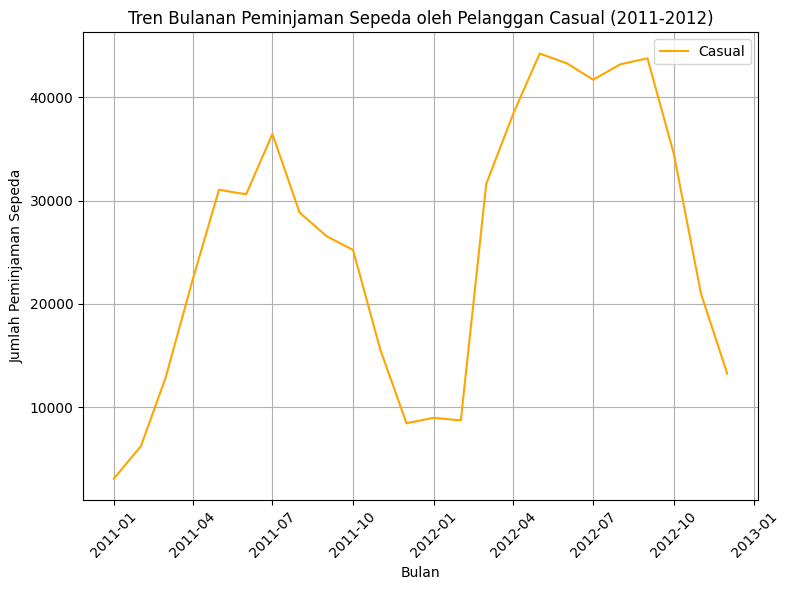

In [ ]:
# Add a 'month_year' column for grouping by year and month
merged_data['month_year'] = merged_data['dteday'].dt.to_period('M')

# Filter the data for the years 2011 and 2012
filtered_data = merged_data[(merged_data['dteday'].dt.year == 2011) | (merged_data['dteday'].dt.year == 2012)]

# Group by 'month_year' and sum the rentals for casual and registered customers
monthly_rentals = filtered_data.groupby('month_year')[['casual_hour']].sum()

# Convert the index to datetime for better plotting
monthly_rentals.index = monthly_rentals.index.to_timestamp()

# Plot the monthly trends for casual and registered customers
plt.figure(figsize=(8,6))
sns.lineplot(data=monthly_rentals, x=monthly_rentals.index, y='casual_hour', label='Casual', color='orange')

# Add labels and title
plt.title('Tren Bulanan Peminjaman Sepeda oleh Pelanggan Casual (2011-2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

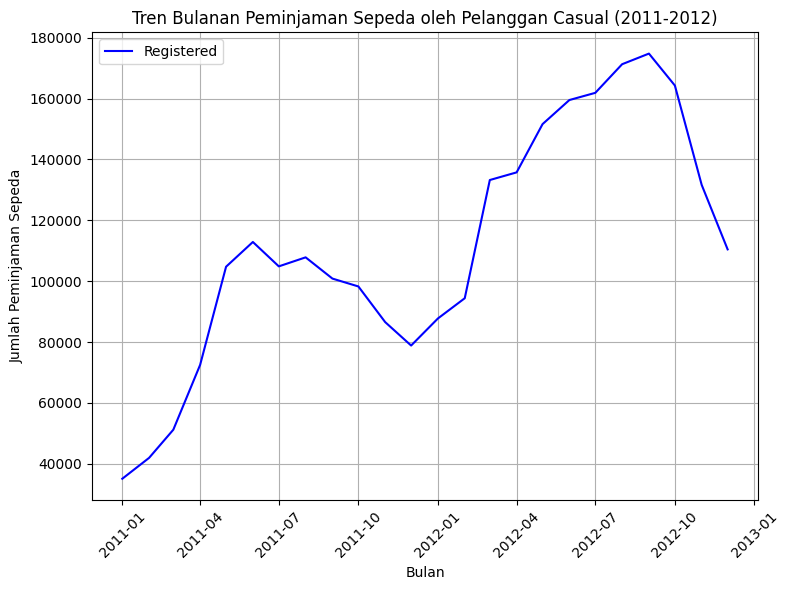

In [ ]:
# Add a 'month_year' column for grouping by year and month
merged_data['month_year'] = merged_data['dteday'].dt.to_period('M')

# Filter the data for the years 2011 and 2012
filtered_data = merged_data[(merged_data['dteday'].dt.year == 2011) | (merged_data['dteday'].dt.year == 2012)]

# Group by 'month_year' and sum the rentals for casual and registered customers
monthly_rentals = filtered_data.groupby('month_year')[['registered_hour']].sum()

# Convert the index to datetime for better plotting
monthly_rentals.index = monthly_rentals.index.to_timestamp()

# Plot the monthly trends for casual and registered customers
plt.figure(figsize=(8,6))
sns.lineplot(data=monthly_rentals, x=monthly_rentals.index, y='registered_hour', label='Registered', color='blue')

# Add labels and title
plt.title('Tren Bulanan Peminjaman Sepeda oleh Pelanggan Casual (2011-2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

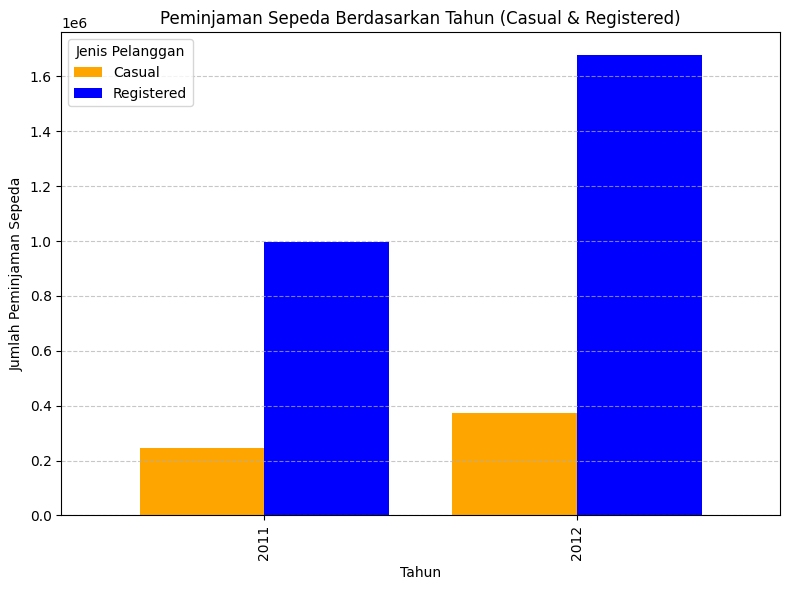

In [ ]:
# Group by 'year' and calculate total rentals for casual and registered users
yearly_rentals = merged_data.groupby('yr_hour')[['casual_hour', 'registered_hour']].sum()

# Rename columns for clarity
yearly_rentals.columns = ['Casual', 'Registered']

# Plot the yearly rentals as a bar chart
yearly_rentals.plot(kind='bar', figsize=(8, 6), color=['orange', 'blue'], width=0.8)

# Add title and labels
plt.title('Peminjaman Sepeda Berdasarkan Tahun (Casual & Registered)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.legend(title='Jenis Pelanggan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


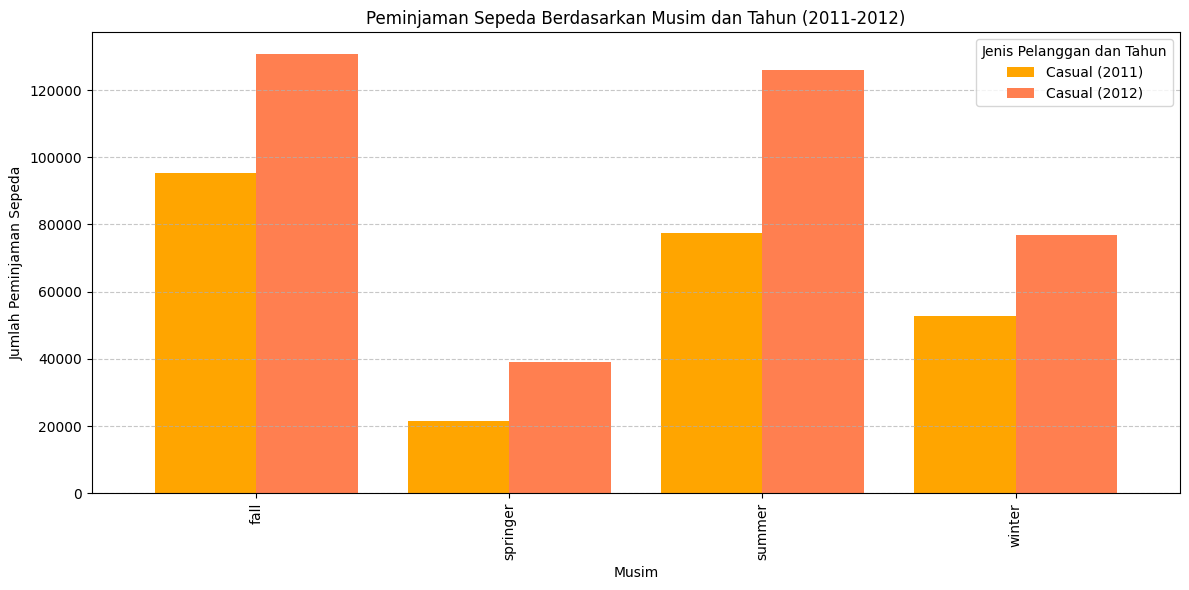

In [ ]:
# Filter data for 2011 and 2012
filtered_data = merged_data[merged_data['yr_hour'].isin([2011, 2012])]

# Group by 'season_name' and 'year', and calculate total rentals for casual and registered users
seasonal_rentals_by_year = filtered_data.groupby(['season_hour', 'yr_hour'])[['casual_hour']].sum().unstack()

# Rename columns for clarity
seasonal_rentals_by_year.columns = ['Casual (2011)', 'Casual (2012)']

# Plot the grouped bar chart
seasonal_rentals_by_year.plot(kind='bar', figsize=(12, 6), color=['orange', 'coral'], width=0.8)

# Add title and labels
plt.title('Peminjaman Sepeda Berdasarkan Musim dan Tahun (2011-2012)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.legend(title='Jenis Pelanggan dan Tahun')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

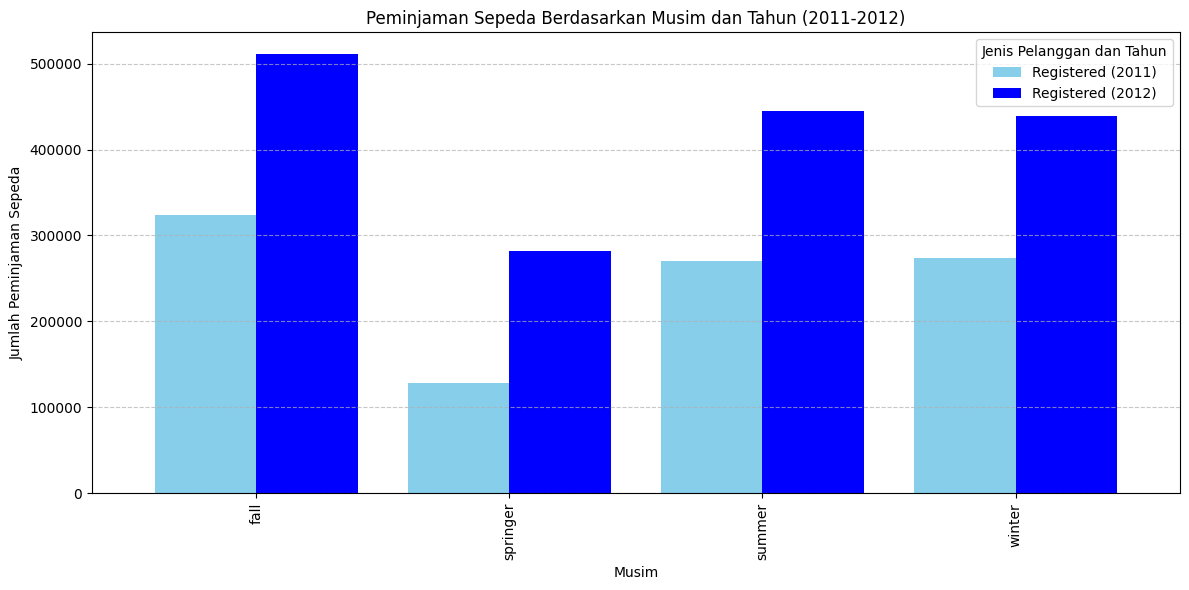

In [ ]:
# Filter data for 2011 and 2012
filtered_data = merged_data[merged_data['yr_hour'].isin([2011, 2012])]

# Group by 'season_name' and 'year', and calculate total rentals for casual and registered users
seasonal_rentals_by_year = filtered_data.groupby(['season_hour', 'yr_hour'])[['registered_hour']].sum().unstack()

# Rename columns for clarity
seasonal_rentals_by_year.columns = ['Registered (2011)', 'Registered (2012)']

# Plot the grouped bar chart
seasonal_rentals_by_year.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'blue'], width=0.8)

# Add title and labels
plt.title('Peminjaman Sepeda Berdasarkan Musim dan Tahun (2011-2012)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.legend(title='Jenis Pelanggan dan Tahun')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

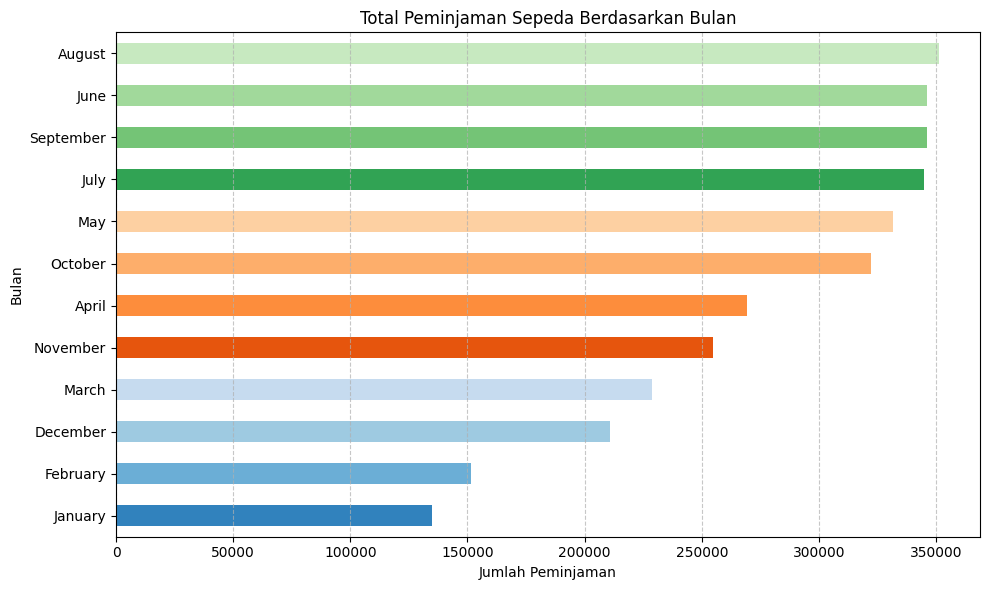

Peminjaman tertinggi terjadi pada bulan 'August'.


In [ ]:
# Group by month and calculate total rentals
monthly_totals = merged_data.groupby('month_name_hour')['cnt_hour'].sum().sort_values(ascending=True)

# Create a colormap with unique colors for each month
colors = plt.cm.tab20c(range(len(monthly_totals)))

# Plotting the monthly rentals as a horizontal bar chart
plt.figure(figsize=(10, 6))
monthly_totals.plot(kind='barh', color=colors)
plt.title('Total Peminjaman Sepeda Berdasarkan Bulan')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Bulan')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the peak month
peak_month = monthly_totals.idxmax()
print(f"Peminjaman tertinggi terjadi pada bulan '{peak_month}'.")

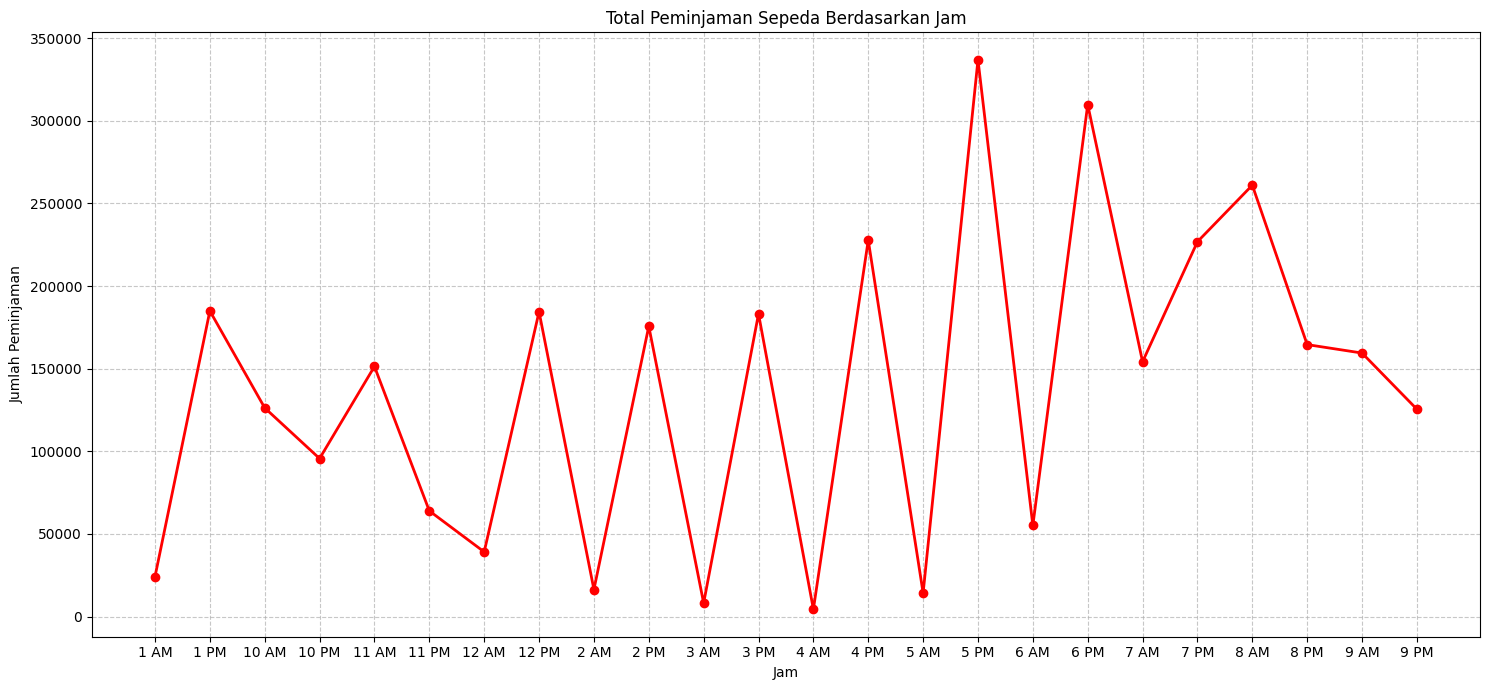

Peminjaman tertinggi terjadi pada jam '5 PM:00' dengan 336860 peminjaman.


In [ ]:
#Group by hour and calculate total rentals
hourly_totals = merged_data.groupby('hour_description')['cnt_hour'].sum()

# Get the peak hour
peak_hour = hourly_totals.idxmax()
peak_hour_value = hourly_totals.max()

# Plotting the hourly rentals as a line chart
plt.figure(figsize=(15, 7))
plt.plot(hourly_totals.index, hourly_totals.values, marker='o', color='red', linestyle='-', linewidth=2, markersize=6)
plt.title('Total Peminjaman Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(range(0, 24))  # Show all 24 hours on x-axis
plt.show()

# Display the peak hour
peak_hour = hourly_totals.idxmax()
peak_hour_value = hourly_totals.max()
print(f"Peminjaman tertinggi terjadi pada jam '{peak_hour}:00' dengan {peak_hour_value} peminjaman.")

### Pertanyaan 3:


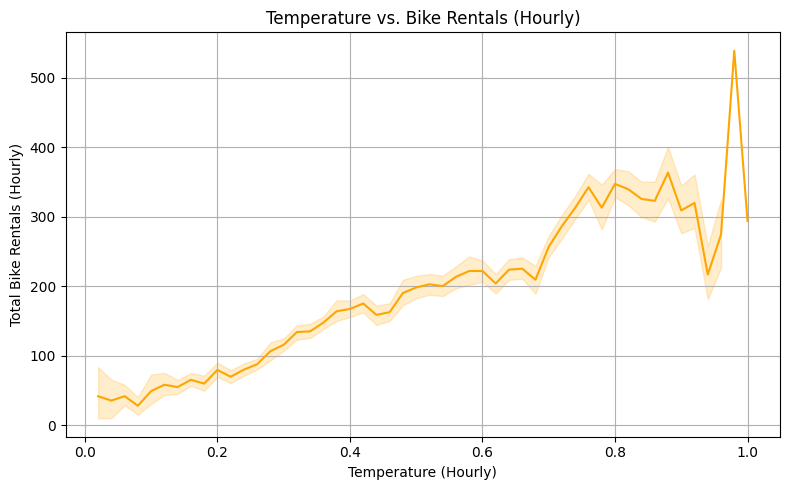

In [ ]:
# Line plot: Temperature vs Bike Rentals (Hourly)
plt.figure(figsize=(8, 5))
sns.lineplot(x=merged_data['temp_hour'], y=merged_data['cnt_hour'], color='orange')
plt.title('Temperature vs. Bike Rentals (Hourly)')
plt.xlabel('Temperature (Hourly)')
plt.ylabel('Total Bike Rentals (Hourly)')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-114-0609a3239435>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merged_data['cnt_hour'], y=merged_data['weather_condition_hour'], palette='coolwarm', estimator='mean', orient='h')


Text(0.5, 1.0, 'Weather Condition vs. Average Bike Rentals (Hourly)')

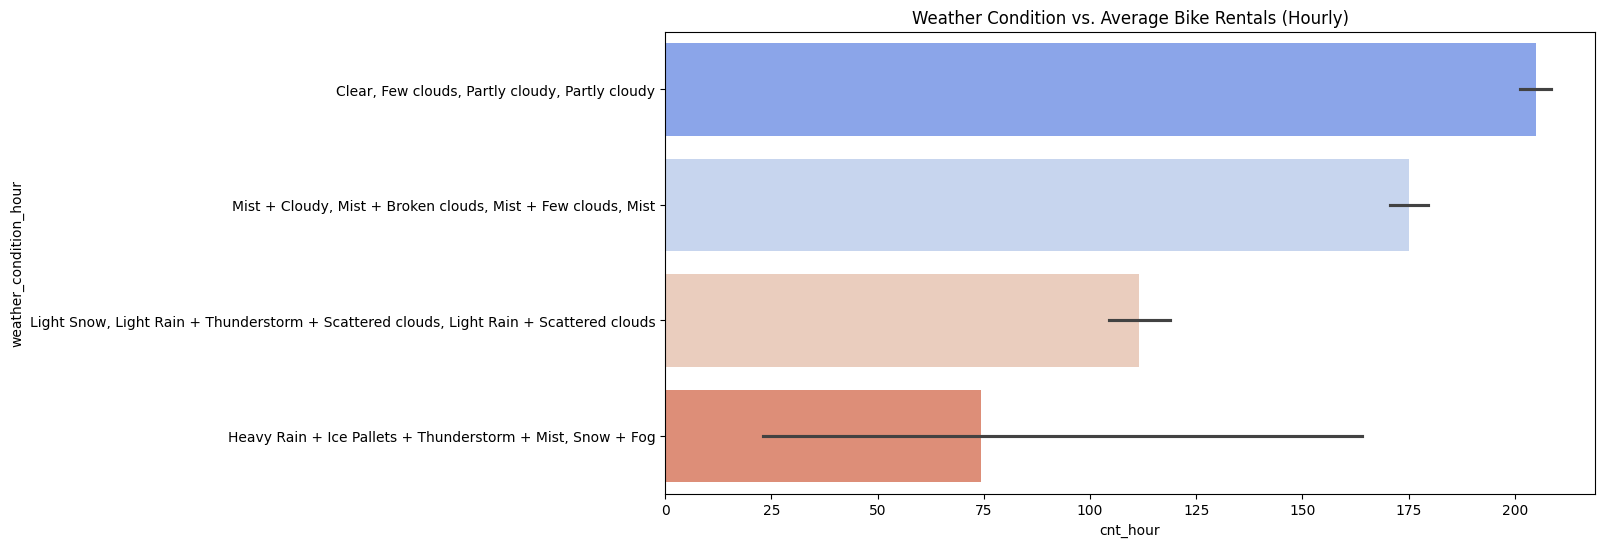

In [ ]:
# Horizontal Bar plot: Weather Condition vs Average Bike Rentals (Hourly)
plt.figure(figsize=(12, 6))
sns.barplot(x=merged_data['cnt_hour'], y=merged_data['weather_condition_hour'], palette='coolwarm', estimator='mean', orient='h')
plt.title('Weather Condition vs. Average Bike Rentals (Hourly)')

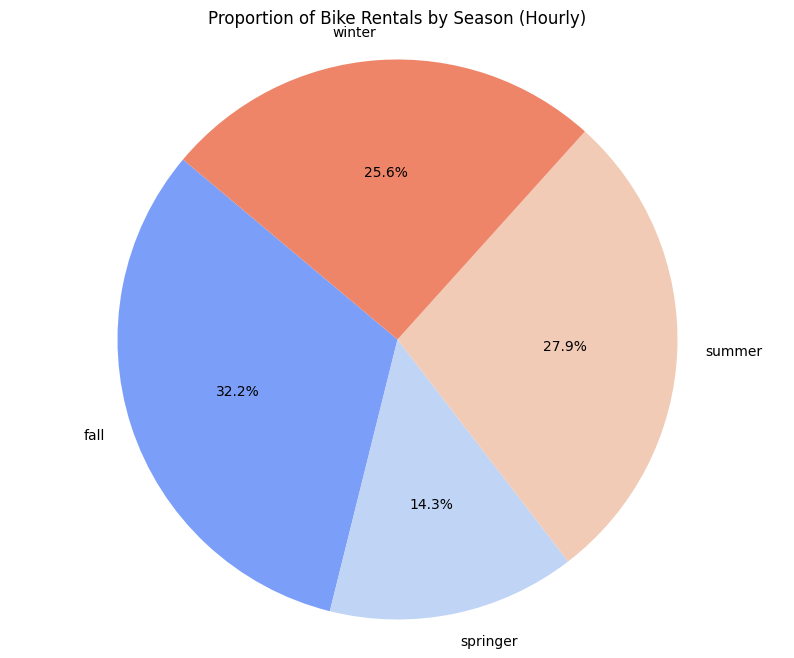

In [ ]:
# Pie chart: Season vs Total Bike Rentals (Hourly)
season_rentals = merged_data.groupby('season_hour')['cnt_hour'].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(season_rentals, labels=season_rentals.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(season_rentals)), startangle=140)
plt.title('Proportion of Bike Rentals by Season (Hourly)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Insight:**
- Trend peningkatan jumlah peminjam sepeda registered user lebih baik dibandingkan casual user
- Bulan yang paling banyak jumlah peminjam sepedanya adalah bulan agustus
- Waktu paling banyak peminjam sepedanya berada pada pukul 5 PM
- Beberapa faktor yang mempengaruhi jumlah peminjam sepeda yaitu: temperatur, season, dan weather condition

## Analisis Lanjutan (Opsional)

   registered_day registered_bins
0             654             Low
1             654             Low
2             654             Low
3             654             Low
4             654             Low


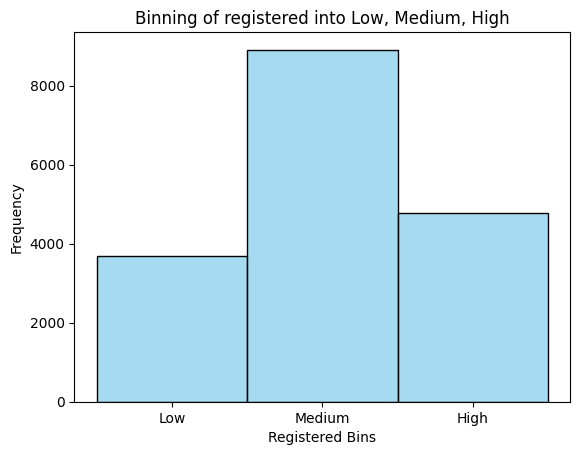

In [ ]:
# Equal-width binning for 'registered'
merged_data['registered_bins'] = pd.cut(merged_data['registered_day'], bins=3, labels=['Low', 'Medium', 'High'])

# Preview the data
print(merged_data[['registered_day', 'registered_bins']].head())

# Visualize the binning
sns.histplot(merged_data['registered_bins'], kde=False, color='skyblue', discrete=True)
plt.title('Binning of registered into Low, Medium, High')
plt.xlabel('Registered Bins')
plt.ylabel('Frequency')
plt.show()

   casual_day casual_bins
0         331         Low
1         331         Low
2         331         Low
3         331         Low
4         331         Low


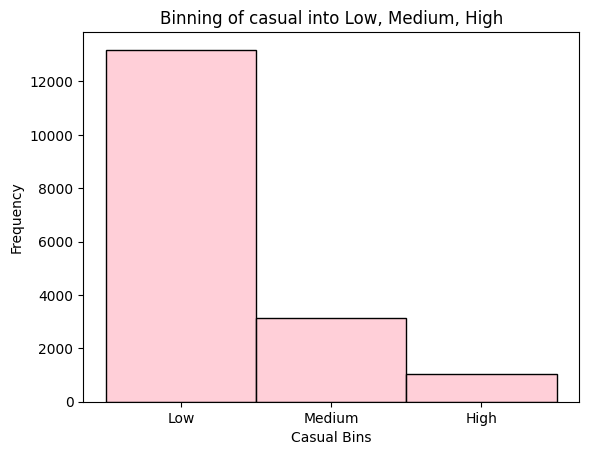

In [ ]:
# Equal-width binning for 'casual'
merged_data['casual_bins'] = pd.cut(merged_data['casual_day'], bins=3, labels=['Low', 'Medium', 'High'])

# Preview the data
print(merged_data[['casual_day', 'casual_bins']].head())

# Visualize the binning
sns.histplot(merged_data['casual_bins'], kde=False, color='pink', discrete=True)
plt.title('Binning of casual into Low, Medium, High')
plt.xlabel('Casual Bins')
plt.ylabel('Frequency')
plt.show()

   cnt_hour cnt_hour_bins
0        16           Low
1        40           Low
2        32           Low
3        13           Low
4         1           Low


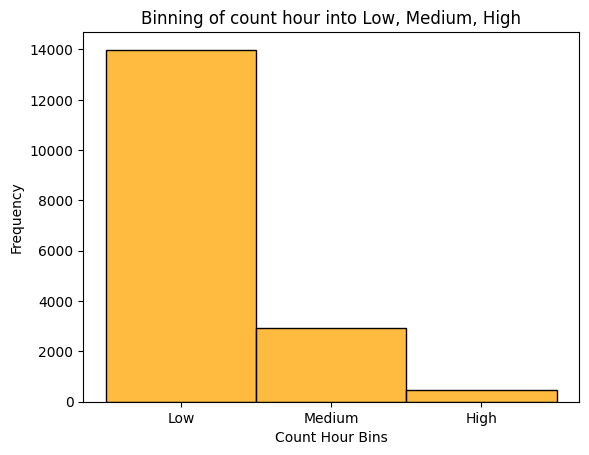

In [ ]:
# Equal-width binning for 'cnt hour'
merged_data['cnt_hour_bins'] = pd.cut(merged_data['cnt_hour'], bins=3, labels=['Low', 'Medium', 'High'])

# Preview the data
print(merged_data[['cnt_hour', 'cnt_hour_bins']].head())

# Visualize the binning
sns.histplot(merged_data['cnt_hour_bins'], kde=False, color='orange', discrete=True)
plt.title('Binning of count hour into Low, Medium, High')
plt.xlabel('Count Hour Bins')
plt.ylabel('Frequency')
plt.show()

## Tahapan Analisis Data dan Insight Proyek Analisis Data Bike Hirings

### Tahapan Analisis Data dan Insight:
- Tahapan yang pertama yaitu membuat pertanyaan bisnis untuk mengetahui apa yang perlu kita capai dalam analisis data ini, data yang digunakan yaitu dataset bike hirings. Berikut pertanyaan bisnis yang saya definisikan untuk proyek analisis data tersebut:
1. Bagaimanaah trend peminjaman sepeda dari "casual" pelanggan dan "registered pelanggan" selama 2011 hingga 2012?
2. Kapankah waktu peminjaman sepeda mencapai tingkat tertinggi? (dalam rentang bulan dan jam)?
3. Faktor-faktor apa sajakah yang sangat mempengaruhi tingkat peminjaman sepeda?

- Tahapan kedua yaitu data wrangling yaitu memanggil data yang digunakan ke dalam notebook proyek analisis data. Data yang digunakan yaitu bike hirings data set yang memiliki dua buah data frame di dalamnya yaitu data frame day dan hour, dimana masing-masing data frame memiliki atribut yang sama, hanya saja ada penambahan atribut pada data frame hour yaitu 'hr' berikut atribut dari kedua data frame tersebut:
1. instant : sebagai index/nomor peminjaman yang telah terdaftar atau terekam sistem
2. dteday : tanggal peminjaman (hari,bulan,tahun)
3. season : musim pada saat peminjaman sepeda, dimana 1: springer, 2: summer, 3:fall, 4: winter
4. year : tahun peminjaman dimana 0: tahun 2011, 1: tahun 2012
5. mnth : bulan peminjaman, 1-12 (Januari sampai Desember)
6. hr : jam peminjaman, 0-23
7. workingday : 1 bila holiday atau weekend, 0 bila lainnya
8. weekday : hari peminjaman 0-6 (Monday to Sunday)
9. weathersit: keadaan cuaca pada saat peminjaman, dimana 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
10. temp : Normalized temperature in Celsius
11. atemp: Normalized feeling temperature
12. hum: kelembapan udara pada saat peminjaman
13. windspeed : kecepatan angin pada saat peminjaman
14. holiday : apakah holiday atau tidak pada saat peminjaman, 1: holiday/weekend, 0: lainnya
15. casual : jumlah peminjam sepeda yang belum terdaftar di aplikasi/sistem bike hirings (pelanggan baru)
16. registered : jumlah peminjam sepeda yang sudah terdaftar di sistem
17. cnt : jumlah peminjam sepeda casual + registered

- Tahapan selanjutnya adalah data assesment yaitu melihat lebih detail isi dari masing-masing atribut yang terdapat dalam kedua data frame tersebut. Ternyata setelah melakukan pengecekan diperoleh simpulan sebagai berikut:
1. Tidak ada nilai missing value dari kedua data frame
2. Tidak ada nilai duplikat dalam kedua data frame
3. Ada beberapa type object yang salah seperti dteday

- Kemudian, akan dilakukan cleaning data yaitu membersihkan data untuk menghasilkan data yang telah bersih dan siap untuk di analisis. Berikut kesimpulan dari tahapan ini:
1. Tidak ada missing value serta duplicate data dalam data frame day dan hour, jadi tidak perlu dilakukan pembersihan untuk hal tersebut.
2. Ada beberapa atribut yang memiliki kesalahan type, jadi perlu di bershikan, antara lain sebagai berikut:
- dteday' sebelumnya bertipe object menjadi datetime
Beberapa atribut diubah menjadi kategorikal untuk kepentingan analisis data, seperti:
1. Year
2. Month
3. Day
4. Hour
5. Season
6. Weather situation
Setelah selesai, maka dua data frame tersebut di gabung, untuk mempermudah melakukan analisis

- Lalu, tahapan selanjutnya adalah Exploratory Data Analysis yaitu melakukan eksplorasi data untuk melihat apa saja informasi yang dapat kita peroleh dari data tersebut. Berikut hasilnya:
1. Waktu paling banyak peminjam sepedanya adalah pada pukul 5 PM
2. Bulan yang paling banyak peminjam sepedanya adalah bulan agustus
3. Season yang paling banyak peminjam sepedanya adalah fall season
4. Casual user paling banyak meminjam sepeda pada bulan July
5. Registered user paling banyak meminjam sepeda pada bulan Agustus
6. Orang cenderung meminjam sepeda pada saat holiday atau weekend, dengan peminjam sepeda paling tinggi berada pada fall season.
7. Semakin tinggi temperatur semakin tinggi juga jumlah peminjam sepeda
8. Kelembapan udara dan windspeed cenderung tidak terlalu mempengaruhi jumlah peminjam sepeda
9. Pada tabel korelasi, terlihat juga yang cukup mempengaruhi jumlah peminjam sepeda yaitu temperatur, atemparature, dan waktu peminjaman.

- Tahapan berikutnya yaitu data visualization dan explanatory analysis, tahapan ini digunakan dengan tujuan untuk menjawab pertanyaan bisnis yang dibuat di awal tadi. Berikut simpulannya:
1. Trend peningkatan jumlah peminjam sepeda antara casual user dan registered user pada tahun 2011 sampai 2012 yaitu, registered user paling banyak peningkatannya dari tahun 2011 hingga 2012, mengalami kenaikan sekitar 600 ribu peminjam sepeda, sedangkan casual user mengalami kenaikan di kisaran 200 ribu peminjam sepeda. Dari jumlah peminjam sepeda pun, registered user jauh lebih banyak dibandingkan casual user. Peningkatan jumlah berdasarkan season, casual user mengalami kenaikan paling tinggi saat fall season, registered user juga mengalami kenaikan paling tinggi saat fall season.
2. Berdasarkan data, rentang waktu yang paling banyak peminjam sepedanya adalah pada bulan agustus dengan sekitar 350 ribu peminjam sepeda, dan paling rendah berada pada bulan Januari, sedangkan untuk waktu berdasarkan jam, yang paling banyak peminjam sepedanya berada pada jam 5 PM dengan 336 ribu lebih peminjam sepeda, dan paling rendah pada saat pukul 1 AM.
3. Faktor-faktor yang mempengaruhi banyaknya peminjam sepeda yaitu antara lain, temperature, dimana semakin tinggi temperaturnya, cenderung semakin tinggi juga peminjam sepedanya. Lalu, kondisi cuaca juga mempengaruhi dimana saat lebih terang cuacanya maka akan semakin tinggi jumlah peminjam sepedanya. Dan terakhir yaitu musim, perubahan musim cenderung mempengaruhi jumlah peminjaman sepeda juga, dimana pada fall season dan summer season, orang lebih banyak untuk melakukan peminjaman sepeda.

- Tahapan terakhir dalam proyek analisis data ini yaitu analisis lanjutan, tujuan dalam penggunaan teknik analisis clustering metode binning yaitu karena dengan teknik tersebut akan didapatkan pengelompokkan secara merata untuk memahami pola berdasarkan rentang data serta cocok untuk memetakan data continue ke dalam data diskrit. Dengan teknik tersebut, dapat diketahui pola pengelompokkan data ke dalam rentang tertentu, mengetahui trend atau pola berdasarkan rentang waktu tertentu ke dalam pegelompokkan ke dalam kategori low, medium, dan high. Hasilnya yaitu pada pengelompokkan berdasarkan registered_day, kategori medium merupakan kategori yang nilainya paling tinggi, sedangkan pada casual day dan count hour, kategori tertinggi yaitu berada pada kategori low.



## Conclusion

- Conclusion pertanyaan 1 : Trend peningkatan jumlah peminjam sepeda antara casual user dan registered user pada tahun 2011 sampai 2012 yaitu, registered user paling banyak peningkatannya dari tahun 2011 hingga 2012, mengalami kenaikan sekitar 600 ribu peminjam sepeda, sedangkan casual user mengalami kenaikan di kisaran 200 ribu peminjam sepeda. Dari jumlah peminjam sepeda pun, registered user jauh lebih banyak dibandingkan casual user. Peningkatan jumlah berdasarkan season, casual user mengalami kenaikan paling tinggi saat fall season, registered user juga mengalami kenaikan paling tinggi saat fall season.
- Conclusion pertanyaan 2 : Berdasarkan data, rentang waktu yang paling banyak peminjam sepedanya adalah pada bulan agustus dengan sekitar 350 ribu peminjam sepeda, dan paling rendah berada pada bulan Januari, sedangkan untuk waktu berdasarkan jam, yang paling banyak peminjam sepedanya berada pada jam 5 PM dengan 336 ribu lebih peminjam sepeda, dan paling rendah pada saat pukul 1 AM.
- Conclusion pertanyaan 3 : Faktor-faktor yang mempengaruhi banyaknya peminjam sepeda yaitu antara lain, temperature, dimana semakin tinggi temperaturnya, cenderung semakin tinggi juga peminjam sepedanya. Lalu, kondisi cuaca juga mempengaruhi dimana saat lebih terang cuacanya maka akan semakin tinggi jumlah peminjam sepedanya. Dan terakhir yaitu musim, perubahan musim cenderung mempengaruhi jumlah peminjaman sepeda juga, dimana pada fall season dan summer season, orang lebih banyak untuk melakukan peminjaman sepeda.